In [59]:
#Gera series aleatorias e ve a correlacao entre elas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dic_serie = {}

for serie in range(1000):
    dic_serie[f"Serie_{serie}"] = np.random.randint(0, 100, 50) #50 elementos na serie


df_series = pd.DataFrame(dic_serie)
print(df_series.head())



   Serie_0  Serie_1  Serie_2  Serie_3  Serie_4  Serie_5  Serie_6  Serie_7  \
0       41       39       58       83       82       26        8       45   
1       96        6       46       45       87       42        4        0   
2       24       81       88       99       33       97       92       91   
3       37        4        0       30       87       52       65       78   
4       54        1       96       13       19       89       72       63   

   Serie_8  Serie_9  ...  Serie_990  Serie_991  Serie_992  Serie_993  \
0       14       94  ...         14         99         58         56   
1       77       46  ...         71         47         92         35   
2       57       71  ...         84         18         13         22   
3       92       53  ...         25         64         76         21   
4       21       56  ...         79         97         61         92   

   Serie_994  Serie_995  Serie_996  Serie_997  Serie_998  Serie_999  
0         61         96         94

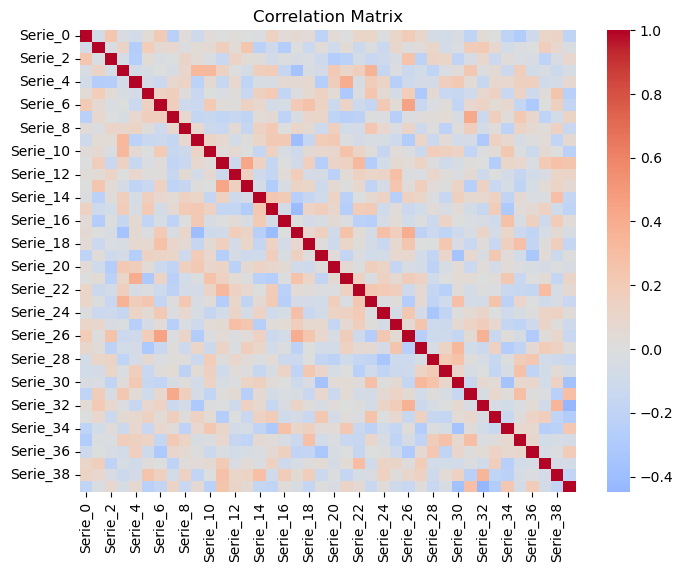

In [60]:

corr = df_series.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr.iloc[:40,:40], annot= False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [61]:
print(corr.iloc[:10,:10]) #Só para ter uma noção


          Serie_0   Serie_1   Serie_2   Serie_3   Serie_4   Serie_5   Serie_6  \
Serie_0  1.000000 -0.074452  0.236703 -0.032790 -0.076761  0.042862  0.199402   
Serie_1 -0.074452  1.000000 -0.028933  0.112606 -0.268669  0.187341  0.065634   
Serie_2  0.236703 -0.028933  1.000000 -0.051618 -0.259449  0.041581 -0.025452   
Serie_3 -0.032790  0.112606 -0.051618  1.000000 -0.070392 -0.045470 -0.001408   
Serie_4 -0.076761 -0.268669 -0.259449 -0.070392  1.000000 -0.064802 -0.127854   
Serie_5  0.042862  0.187341  0.041581 -0.045470 -0.064802  1.000000  0.137957   
Serie_6  0.199402  0.065634 -0.025452 -0.001408 -0.127854  0.137957  1.000000   
Serie_7 -0.236987  0.082476 -0.006575 -0.036207  0.086344  0.170267  0.166798   
Serie_8  0.030462 -0.015502  0.115023  0.093846  0.123275  0.012662 -0.103690   
Serie_9 -0.099216  0.038304  0.041751  0.336464 -0.220315 -0.146250 -0.128835   

          Serie_7   Serie_8   Serie_9  
Serie_0 -0.236987  0.030462 -0.099216  
Serie_1  0.082476 -0.015502 

In [62]:

max_less_than_1 = corr[corr < 1].max().max()

print(max_less_than_1)

location = np.where(corr == max_less_than_1)

print(f"Max value < 1: {max_less_than_1}")
print(f"Location: row {location[0][0]}, column {corr.columns[location[1][0]]}")

0.6942706764908567
Max value < 1: 0.6942706764908567
Location: row 818, column Serie_824


In [63]:
print(corr.iloc[location[0][0],location[1][0]])

serie_a = df_series[ corr.columns[location[0][0]]]
serie_b = df_series[ corr.columns[location[1][0]]]

print(list(zip(serie_a, serie_b)))

0.6942706764908567
[(75, 92), (18, 37), (15, 45), (13, 5), (14, 33), (27, 67), (75, 74), (48, 23), (64, 57), (51, 61), (47, 47), (91, 90), (37, 61), (68, 89), (41, 25), (60, 59), (29, 39), (44, 70), (12, 47), (41, 8), (29, 36), (66, 38), (65, 33), (77, 83), (32, 2), (76, 66), (48, 91), (35, 12), (23, 30), (28, 10), (45, 60), (87, 53), (29, 35), (31, 47), (28, 41), (12, 2), (81, 85), (37, 10), (31, 48), (86, 90), (44, 40), (66, 48), (8, 19), (59, 61), (15, 35), (13, 2), (85, 98), (16, 64), (62, 90), (86, 85)]


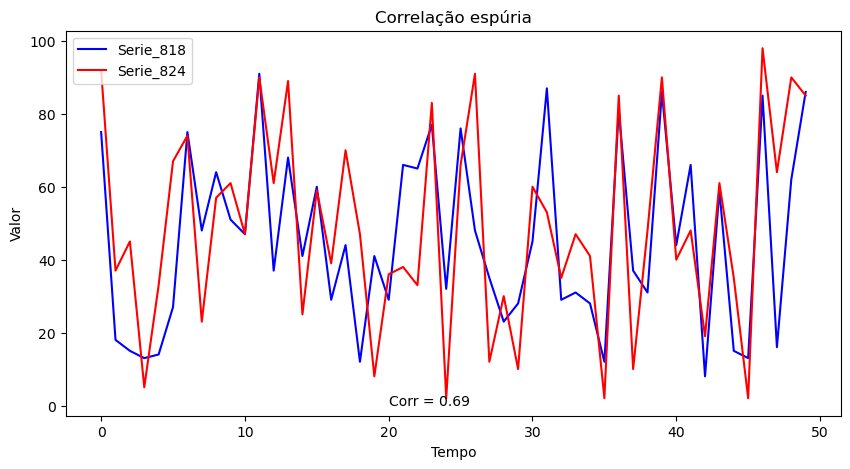

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(serie_a, color='blue')
plt.plot(serie_b, color = 'red')

plt.title("Correlação espúria")
plt.legend([corr.columns[location[0][0]], corr.columns[location[1][0]]])
plt.xlabel("Tempo")
plt.ylabel("Valor")


plt.text(20,0, "Corr = {:.2f}".format(max_less_than_1))
plt.show()
